In [1]:
#导入世界数据
import pandas
data_filename='/content/drive/MyDrive/代码/读芯术/大数据分析与挖掘/新冠疫情分析/alltime_world_2021_01_07.csv'
data=pandas.read_csv(data_filename,sep=',',decimal='.')
data

,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input,name
0,2020-03-03,1,0,0,0,0,0,1,0.0,0,0,NaN,NaN,NaN,突尼斯
1,2020-03-08,2,0,0,0,0,0,1,0.0,0,0,0.0,NaN,0.0,突尼斯
2,2020-03-09,5,0,0,0,0,0,3,0.0,0,0,0.0,NaN,0.0,突尼斯
3,2020-03-11,7,0,0,0,0,0,2,0.0,0,0,0.0,NaN,0.0,突尼斯
4,2020-03-12,13,0,0,0,0,0,6,0.0,0,0,0.0,NaN,0.0,突尼斯
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46467,2021-01-02,17714,0,17228,261,0,0,0,NaN,0,0,NaN,NaN,0.0,马达加斯加
46468,2021-01-03,17767,0,17298,262,0,0,53,NaN,70,1,NaN,NaN,0.0,马达加斯加
46469,2021-01-04,17767,0,17298,262,0,0,0,NaN,0,0,NaN,NaN,0.0,马达加斯加
46470,2021-01-05,17767,0,17298,262,0,0,0,NaN,0,0,NaN,NaN,0.0,马达加斯加


In [2]:
a = data.loc[0,['date']]
a

date    2020-03-03
Name: 0, dtype: object

一共有多少个确诊病例、死亡病例、治愈病例

In [3]:
a=data['total_confirm'].sum()
b=data['total_dead'].sum()
c=data['total_heal'].sum()
print(a)
print(b)
print(c)

8085167720
232193288
5544870312


In [4]:
data.describe()

,total_confirm,total_suspect,total_heal,total_dead,total_severe,total_input,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,today_input
count,4.647200e+04,46472.000000,4.647200e+04,46472.000000,46472.000000,46472.000000,46472.000000,12909.000000,4.647200e+04,46472.000000,12509.000000,0.0,46276.000000
mean,1.739793e+05,5.893527,1.193164e+05,4996.412636,2.380810,15.413905,1886.237154,3.528314,1.329389e+03,40.677677,-0.581341,NaN,0.094196
std,8.830942e+05,321.784752,6.413393e+05,20635.612748,103.685836,209.917572,10614.219535,95.676476,9.301324e+03,182.708461,12.372097,NaN,3.650378
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-65415.000000,0.000000,-3.444680e+05,-6464.000000,-464.000000,NaN,-19.000000
25%,1.289000e+03,0.000000,5.150000e+02,24.000000,0.000000,0.000000,5.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000
50%,8.887000e+03,0.000000,4.943000e+03,157.000000,0.000000,0.000000,78.000000,0.000000,2.300000e+01,1.000000,0.000000,NaN,0.000000
75%,7.170250e+04,0.000000,4.035375e+04,1408.000000,0.000000,0.000000,637.000000,0.000000,3.400000e+02,11.000000,0.000000,NaN,0.000000
max,2.185762e+07,28942.000000,1.302414e+07,369990.000000,7365.000000,4359.000000,880962.000000,4008.000000,1.151187e+06,7867.000000,0.000000,NaN,723.000000


数据探索性分析

In [5]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from sklearn. preprocessing import StandardScaler, OneHotEncoder
from sklearn. model_selection import train_test_split
import seaborn as sns
from scipy. stats import norm
from scipy import stats
from pandas import DataFrame
import matplotlib
%matplotlib inline

按日期统计所有的确诊、嫌疑、康复、死亡人数

In [6]:
data2 = data.groupby(['date'])[['total_confirm', 'total_suspect', 'total_heal', 'total_dead']].sum()
data2

,total_confirm,total_suspect,total_heal,total_dead
date,,,,
2020-01-20,1,0,0,0
2020-01-21,1,0,0,0
2020-01-22,1,0,0,0
2020-01-23,1,0,0,0
2020-01-24,2,0,0,0
...,...,...,...,...
2021-01-02,84382740,0,59498289,1834115
2021-01-03,85033436,0,59961778,1842629
2021-01-04,85509559,0,60276490,1849659


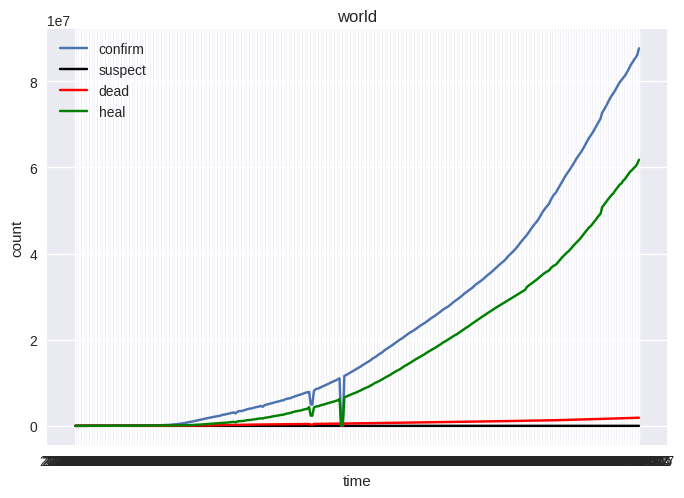

In [7]:
plt.style.use("seaborn")
plt.figure(dpi=100)
# zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.plot(data2['total_confirm'], label='confirm')
plt.plot(data2['total_suspect'], color='black',label='suspect')
plt.plot(data2['total_dead'], color='red',label='dead')
plt.plot(data2['total_heal'], color='green',label='heal')
plt.xlabel('time')
plt.ylabel('count')
plt.title("world")
plt.legend(loc="best") #加图例

In [8]:
#用增长模型预测
def logistic_increase_function(p, t):
    K, a, b = p
    exp_value = np.exp(-a * (t - b))
    return K / (1 + exp_value)
# 定义预测误差函数
def err_f(p, t, y):
    return logistic_increase_function(p, t) - y

取最后60天数据

In [9]:
data3 = data2.tail(60)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
# from scipy.optimize import curve_fit  # 非线性最小二乘法拟合
from scipy.optimize  import leastsq
from scipy.optimize  import leastsq

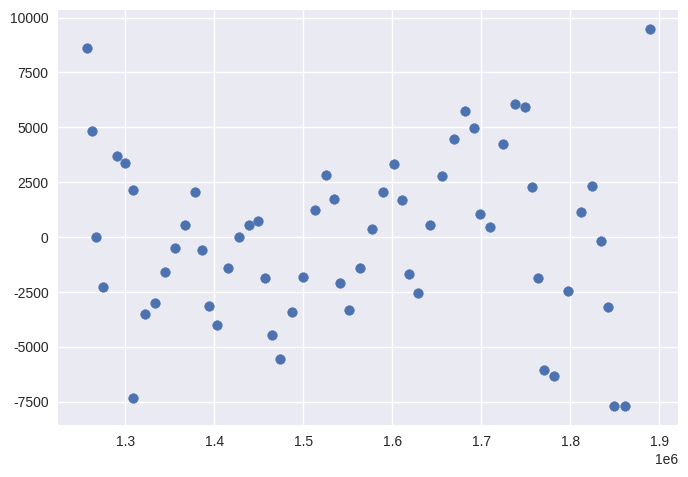

In [11]:
# 参数初始值
logistic_p0 = [8000000, 1, 30]  
 
# 我们选择的数据
t = np.array([i + 1 for i in range(60)])
world_y = data3['total_dead'].values
 
# 利用最小二乘法求解参数
logistic_params = leastsq(err_f, logistic_p0, args=(t, world_y))
 
world_p = logistic_params[0]
 
# 利用我们定义的逻辑斯蒂增长函数预测
world_predict_data = logistic_increase_function(world_p, t)
world_predict_data
 
# 预测的误差
world_e = world_y - world_predict_data
world_e
 
# 绘制误差的散点图
plt.figure(dpi=100)
plt.scatter(world_y, world_e)

绘图

In [18]:
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
!mv SimHei.ttf /usr/share/fonts/truetype/

--2021-03-06 07:11:59--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... failed: Connection timed out.
Retrying.

--2021-03-06 07:12:32--  (try: 2)  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... failed: Connection timed out.
Retrying.

--2021-03-06 07:13:06--  (try: 3)  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... failed: Connection timed out.
Retrying.

--2021-03-06 07:13:40--  (try: 4)  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... failed: Connection timed out.
Retrying.

--2021-03-06 07:14:16--  (try: 5)  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip


In [19]:
zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.figure(dpi=100)
plt.scatter(t, world_y, label="实际死亡数量")
plt.plot(t, world_predict_data, label='预测死亡数量曲线')
plt.xlabel('time', fontproperties=zhfont)
plt.ylabel('死亡数量', fontproperties=zhfont)
plt.legend(loc='best', prop=zhfont) 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff072f51320> (for post_execute):


FileNotFoundError: ignored

FileNotFoundError: ignored

<Figure size 800x550 with 1 Axes>

预测

In [13]:
future_t = [i + 1 for i in range(0, 1)]
world_future_fit = logistic_increase_function(world_p, future_t)
world_future_fit

array([1247588.20890369])

预测世界疫情未来30天走势

In [15]:
future_t = [i + 1 for i in range(0, 60)]
world_future_fit = logistic_increase_function(world_p, future_t)
world_future_fit

array([1247588.20890369, 1257218.56183814, 1266893.46327179,
       1276612.66114497, 1286375.89595161, 1296182.90072605,
       1306033.40103206, 1315927.1149542 , 1325863.75309159,
       1335843.01855394, 1345864.60696008, 1355928.20643893,
       1366033.49763284, 1376180.1537036 , 1386367.84034078,
       1396596.21577277, 1406864.93078031, 1417173.62871264,
       1427521.9455063 , 1437909.50970647, 1448335.94249111,
       1458800.85769764, 1469303.86185239, 1479844.55420273,
       1490422.52675189, 1501037.36429659, 1511688.6444673 ,
       1522375.93777135, 1533098.80763869, 1543856.81047052,
       1554649.4956906 , 1565476.40579931, 1576337.0764306 ,
       1587231.03641153, 1598157.80782466, 1609116.90607324,
       1620107.83994901, 1631130.11170285, 1642183.2171181 ,
       1653266.64558663, 1664379.88018753, 1675522.39776859,
       1686693.66903034, 1697893.1586128 , 1709120.32518482,
       1720374.62153601, 1731655.49467126, 1742962.3859078 ,
       1754294.73097473,

绘图

In [16]:
plt.figure(dpi=100)
plt.scatter(t, world_y, label="实际死亡数量")
plt.plot(future_t, world_future_fit, label="预测死亡数量")
plt.xlabel('time', fontproperties=zhfont)
plt.ylabel('死亡数量', fontproperties=zhfont)
plt.legend(loc='best', prop=zhfont) 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff072f51320> (for post_execute):


FileNotFoundError: ignored

FileNotFoundError: ignored

<Figure size 800x550 with 1 Axes>